In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("unsupervised_dataset.csv")

Generated data by myself. 1000 samples among which 50 are outliers

In [4]:
df.head()

,feature_1,feature_2
0,4.586280,2.990218
1,1.009911,4.010415
2,3.453109,2.814832
3,2.687654,1.012342
4,1.834824,1.381133


The generated data need not to be scaled. Also no null values, since we already know to scale the data and to handle missing values. But added outliers just to see how K-means and DBScan handles the outliers

In [6]:
df.shape

(1000, 2)

In [7]:
df.isnull().sum()

feature_1    0
feature_2    0
dtype: int64

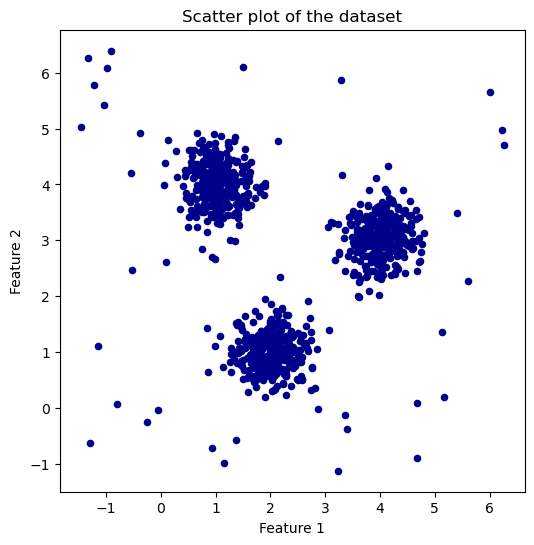

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(df['feature_1'], df['feature_2'], s=20, color='darkblue')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of the dataset")
plt.show()


Since it is 2d data, we can clearly see there are 3 clusters. But real dataset has multiple features so we cannot visualize them to see how many clusters are there in data. So to find the value of K i.e number of clusters, we use Elbow method

#### Elbow method to find the value of K:

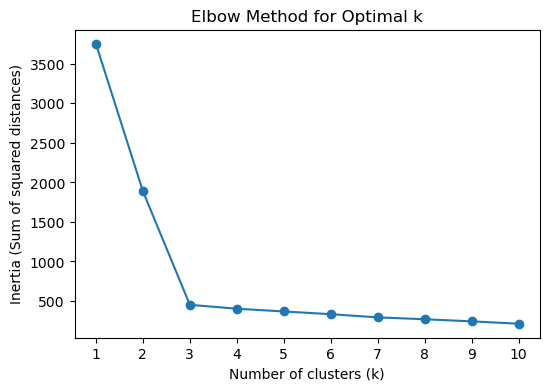

In [11]:
from sklearn.cluster import KMeans
# Try different values of k
inertia = []
K_range = range(1, 11)  # Check k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['feature_1', 'feature_2']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11)) 
plt.show()


Since the curve is easy to read as it is systhethic dataset, we can easily find the value of K from above curve i.e. 3. But in real world datasets, the elbow curve is often not clear-cut, so visually picking the "elbow" becomes tricky. That’s where the kneed method comes in.

#### Using Kneed method to find exact value of K

In [14]:
# %pip install kneed

In [15]:
from kneed import KneeLocator

# Suppose K_range and wcss are already defined
knee = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 3


### Silhouette Score

Measures how well each point fits within its cluster compared to other clusters.

**Range:** -1 to +1

- **+1** → Well-clustered
- **0**  → Overlapping clusters, unclear assignment  
- **-1** → Probably misclassified

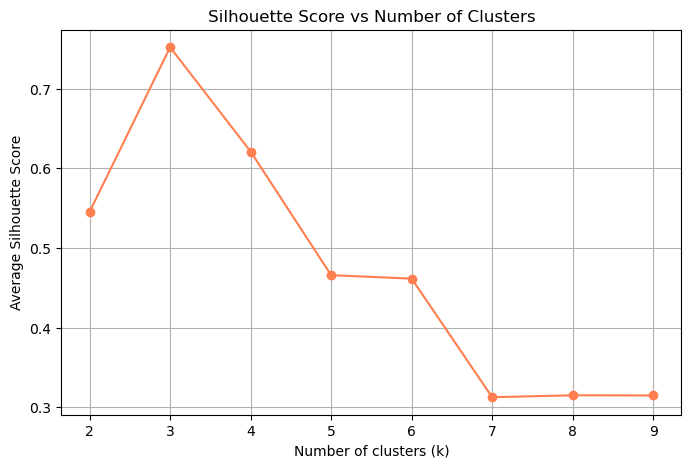

In [17]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of k values to test
k_values = range(2, 10)  # Silhouette score needs at least 2 clusters
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(df[['feature_1', 'feature_2']])
    score = silhouette_score(df[['feature_1', 'feature_2']], kmeans.labels_)
    sil_scores.append(score)

# Plot Silhouette scores vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(k_values, sil_scores, marker='o', linestyle='-', color='coral')
plt.xticks(k_values)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()


#### Train the model

In [19]:
# Set the number of clusters
k = 3  

# Initialize KMeans
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit the model to the data
kmeans.fit(df[['feature_1', 'feature_2']])

# Assign cluster labels to each point
df['cluster'] = kmeans.labels_

# Check the first few rows
df.head()


,feature_1,feature_2,cluster
0,4.586280,2.990218,2
1,1.009911,4.010415,0
2,3.453109,2.814832,2
3,2.687654,1.012342,1
4,1.834824,1.381133,1


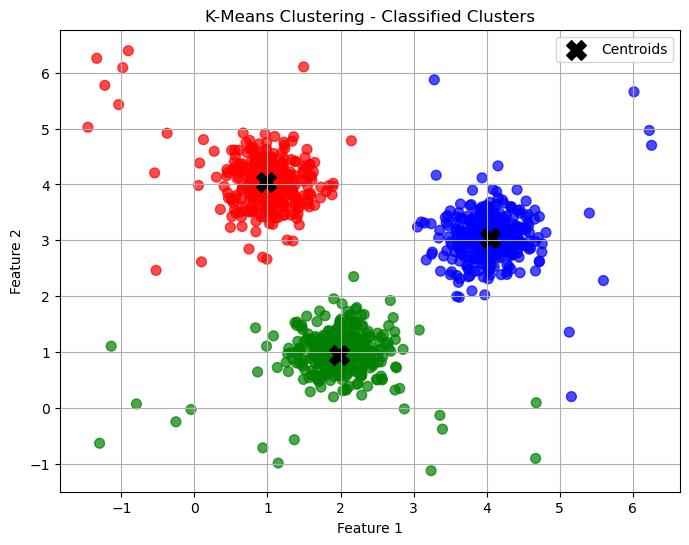

In [20]:
import matplotlib.pyplot as plt

# Assuming kmeans is already trained
colors = ['red', 'green', 'blue']  # cluster colors in your desired order

# Map cluster labels to colors
cluster_colors = [colors[label] for label in kmeans.labels_]

plt.figure(figsize=(8, 6))
plt.scatter(df['feature_1'], df['feature_2'], c=cluster_colors, s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering - Classified Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
